# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080


3.312662532506501 -0.17023670840207009
3.316663332666533 -0.17417773672126768
3.320664132826565 -0.1781159770853245
3.324664932986597 -0.18205136645726647
3.328665733146629 -0.18598384184575362
3.332666533306661 -0.18991334030608828
3.336667333466693 -0.19383979894122266
3.340668133626725 -0.19776315490276555
3.3446689337867572 -0.20168334539198834
3.3486697339467892 -0.20560030766083012
3.3526705341068213 -0.20951397901290214
3.3566713342668533 -0.21342429680449132
3.3606721344268853 -0.21733119844556295
3.3646729345869173 -0.2212346214007625
3.3686737347469493 -0.2251345031904166
3.3726745349069813 -0.2290307813915332
3.3766753350670133 -0.23292339363880057
3.3806761352270454 -0.23681227762558568
3.3846769353870774 -0.24069737110493142
3.3886777355471094 -0.24457861189055305
3.3926785357071414 -0.24845593785783343
3.3966793358671734 -0.25232928694481754
3.4006801360272054 -0.25619859715320586
3.4046809361872374 -0.26006380654934663
3.4086817363472695 -0.2639248532652272
3.4126825365

-0.2705684596696734
6.013202640528106 -0.2667147312719234
6.017203440688138 -0.26285673373668095
6.02120424084817 -0.2589945288165229
6.025205041008202 -0.2551281783313711
6.029205841168234 -0.2512577441675027
6.033206641328266 -0.24738328827655995
6.037207441488298 -0.24350487267455836
6.04120824164833 -0.2396225594408941
6.045209041808362 -0.23573641071735024
6.049209841968394 -0.2318464887071022
6.053210642128426 -0.22795285567372206
6.057211442288458 -0.22405557394018197
6.06121224244849 -0.22015470588785654
6.065213042608522 -0.21625031395552435
6.069213842768554 -0.2123424606383686
6.073214642928586 -0.20843120848697666
6.077215443088618 -0.204516620106339
6.08121624324865 -0.200598758154847
6.085217043408682 -0.1966776853432901
6.089217843568714 -0.19275346443385194
6.093218643728746 -0.18882615823910584
6.097219443888778 -0.18489582962100937
6.10122024404881 -0.18096254148989815
6.105221044208842 -0.17702635680347892
6.109221844368874 -0.17308733856582173
6.113222644528906 -0.1

0.29451961236043306
9.129825965193039 0.2906939190532686
9.13382676535307 0.2868635727886063
9.137827565513103 0.28302863487642627
9.141828365673135 0.27918916670020416
9.145829165833167 0.2753452297159288
9.149829965993199 0.27149688545111844
9.15383076615323 0.26764419550383595
9.157831566313263 0.26378722154170287
9.161832366473295 0.25992602530091224
9.165833166633327 0.25606066858524057
9.169833966793359 0.25219121326505844
9.17383476695339 0.24831772127634041
9.177835567113423 0.2444402546196733
9.181836367273455 0.2405588753592641
9.185837167433487 0.23667364562194637
9.189837967593519 0.2327846275961859
9.193838767753551 0.22889188353108528
9.197839567913583 0.22499547573538742
9.201840368073615 0.22109546657647838
9.205841168233647 0.217191918479389
9.209841968393679 0.21328489392579572
9.213842768553711 0.20937445545302036
9.217843568713743 0.2054606656530294
9.221844368873775 0.20154358717143178
9.225845169033807 0.19762328270647642
9.229845969193839 0.19369981500804856
9.23

11.886377275455091 -0.6287878445180557
11.890378075615123 -0.6256718906937124
11.894378875775155 -0.6225459221269746
11.898379675935187 -0.6194099888532849
11.90238047609522 -0.6162641410675846
11.906381276255251 -0.6131084291235107
11.910382076415283 -0.6099429035325895
11.914382876575315 -0.6067676149634283
11.918383676735347 -0.6035826142409044
11.92238447689538 -0.6003879523453516
11.926385277055411 -0.5971836804117436
11.930386077215443 -0.5939698497288768
11.934386877375475 -0.5907465117385481
11.938387677535507 -0.587513718034732
11.94238847769554 -0.5842715203627548
11.946389277855571 -0.5810199706184664
11.950390078015603 -0.5777591208474095
11.954390878175635 -0.5744890232439864
11.958391678335667 -0.571209730150624
11.9623924784957 -0.5679212940569355
11.966393278655731 -0.5646237675988803
11.970394078815763 -0.561317203557922
11.974394878975795 -0.5580016548601832
11.978395679135827 -0.5546771745755977
11.98239647929586 -0.5513438159170625
11.986397279455892 -0.548001632239

0.7453034586540876
14.870974194838968 0.7426300658911333
14.874974994999 0.7399447863087216
14.878975795159032 0.7372476628884593
14.882976595319064 0.7345387388015304
14.886977395479096 0.7318180574080048
14.890978195639129 0.7290856622561441
14.89497899579916 0.7263415970817053
14.898979795959193 0.7235859058072396
14.902980596119225 0.7208186325413904
14.906981396279257 0.7180398215781867
14.910982196439289 0.7152495173963344
14.91498299659932 0.7124477646585039
14.918983796759353 0.7096346082106161
14.922984596919385 0.7068100930811234
14.926985397079417 0.7039742644802902
14.930986197239449 0.701127167799468
14.93498699739948 0.6982688486103702
14.938987797559513 0.695399352664341
14.942988597719545 0.6925187258916251
14.946989397879577 0.6896270144006305
14.950990198039609 0.686724264477192
14.95499099819964 0.6838105225838296
14.958991798359673 0.6808858353590048
14.962992598519705 0.6779502496163744
14.966993398679737 0.6750038123440412
14.970994198839769 0.6720465707038011
14.

17.735547109421884 -0.8974740481951716
17.739547909581916 -0.8957022482601817
17.743548709741948 -0.8939161113741289
17.74754950990198 -0.8921156661265994
17.75155031006201 -0.8903009413362054
17.755551110222044 -0.8884719660501225
17.759551910382076 -0.8866287695436251
17.763552710542108 -0.884771381319618
17.76755351070214 -0.882899831108164
17.77155431086217 -0.8810141488660078
17.775555111022204 -0.8791143647760973
17.779555911182236 -0.8772005092470996
17.783556711342268 -0.8752726129129145
17.7875575115023 -0.8733307066321846
17.79155831166233 -0.8713748214878007
17.795559111822364 -0.8694049887864048
17.799559911982396 -0.867421240057889
17.803560712142428 -0.8654236070548901
17.80756151230246 -0.8634121217522823
17.81156231246249 -0.861386816346665
17.815563112622524 -0.8593477232558471
17.819563912782556 -0.8572948751183287
17.823564712942588 -0.8552283047927784
17.82756551310262 -0.8531480453575072
17.831566313262652 -0.8510541301099395
17.835567113422684 -0.8489465925660793


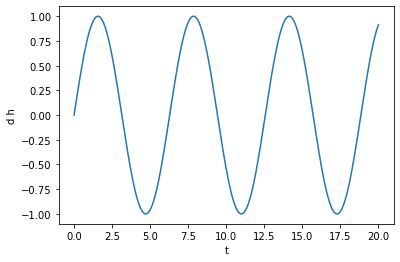

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

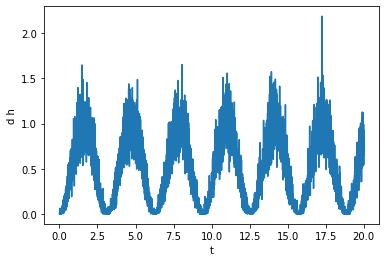

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

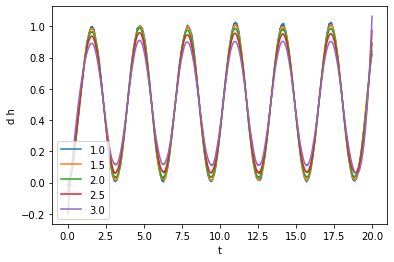

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

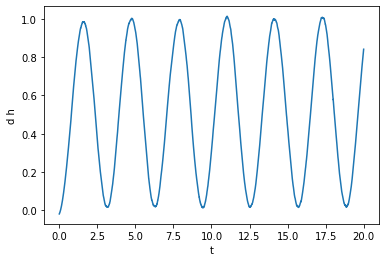

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.1921


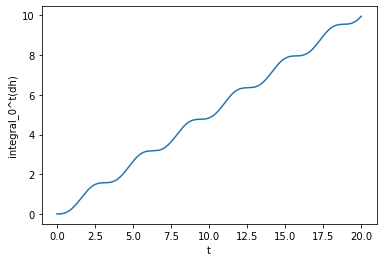

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

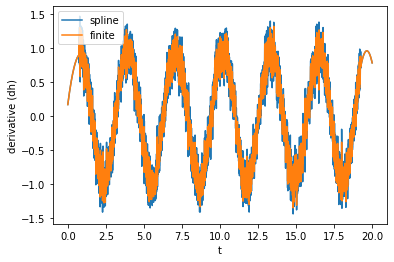

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

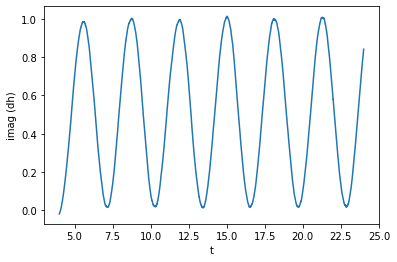

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

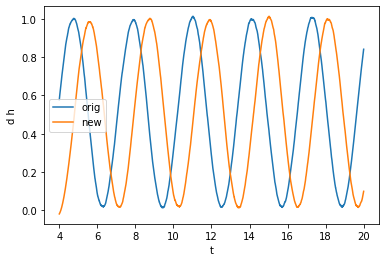

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

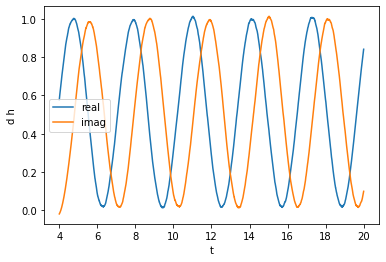

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

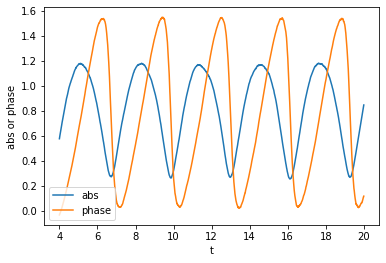

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

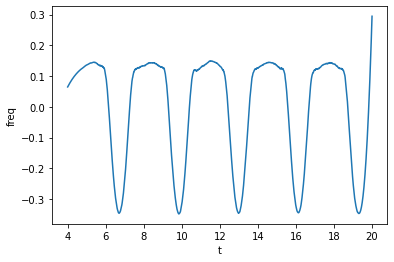

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

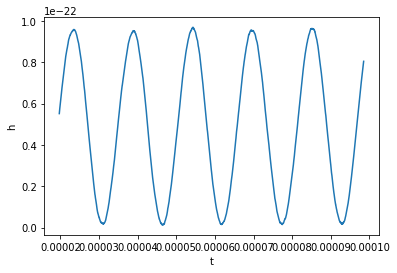

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

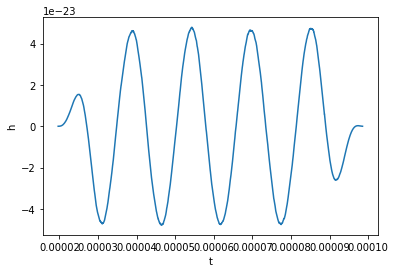

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

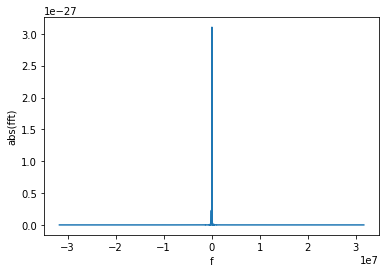

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

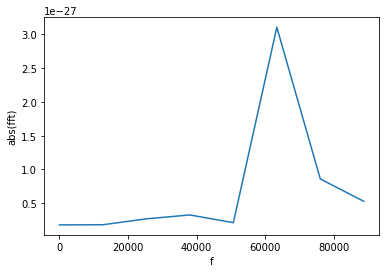

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64231.64


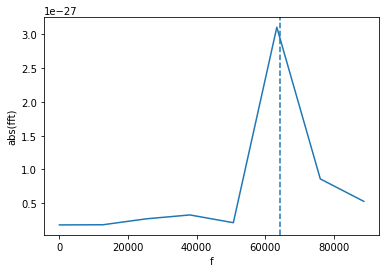

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.103e-27
Maximum with mask 8.604e-28
Length with mask 8
Length after having removed the masked points 7
